In [1]:
# Multiclass Classification with the Iris Flowers Dataset
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

In [3]:
# load dataset
dataframe = pd.read_csv("dati/sonar.csv", header=None)
dataset = dataframe.values
# split into input and output variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [4]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [5]:
X.shape

(208, 60)

In [6]:
# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(100, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X, encoded_Y, epochs = 200, batch_size = 32)

Epoch 1/200
7/7 [==============================] - 1s 3ms/step - loss: 0.6896 - accuracy: 0.5288
Epoch 2/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.5337
Epoch 3/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5433
Epoch 4/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.5721
Epoch 5/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.6490
Epoch 6/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.6923
Epoch 7/200
7/7 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.6971
Epoch 8/200
7/7 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7163
Epoch 9/200
7/7 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.7404
Epoch 10/200
7/7 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.7644
Epoch 11/200
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.9712
Epoch 85/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9567
Epoch 86/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.9615
Epoch 87/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1396 - accuracy: 0.9567
Epoch 88/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9567
Epoch 89/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.9712
Epoch 90/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9519
Epoch 91/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1301 - accuracy: 0.9663
Epoch 92/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.9760
Epoch 93/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1304 - accuracy: 0.9663
Epoch 94/200
7/7 [===============

7/7 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 1.0000
Epoch 168/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 169/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 170/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 171/200
7/7 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 1.0000
Epoch 172/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 173/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 174/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 1.0000
Epoch 175/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 1.0000
Epoch 176/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 1.0000
Epoch 177/200
7/7 [=====

In [8]:
history.history

{'loss': [0.6896404027938843,
  0.6837959885597229,
  0.6766237020492554,
  0.6683104038238525,
  0.6529786586761475,
  0.6350037455558777,
  0.6133137941360474,
  0.5891822576522827,
  0.5558000206947327,
  0.5218931436538696,
  0.5103744864463806,
  0.4876081049442291,
  0.4730687439441681,
  0.4383152425289154,
  0.43438488245010376,
  0.42106664180755615,
  0.4375949501991272,
  0.4269717037677765,
  0.4106976389884949,
  0.39595741033554077,
  0.3862050473690033,
  0.3733038604259491,
  0.3814384639263153,
  0.36491158604621887,
  0.3654762804508209,
  0.36902302503585815,
  0.35290759801864624,
  0.34698808193206787,
  0.34333911538124084,
  0.3386034667491913,
  0.33385971188545227,
  0.3420473635196686,
  0.35403040051460266,
  0.35592904686927795,
  0.3339839577674866,
  0.3098127543926239,
  0.3155023455619812,
  0.3134799301624298,
  0.30827710032463074,
  0.3204794228076935,
  0.3033964931964874,
  0.2931721806526184,
  0.28706902265548706,
  0.2797236144542694,
  0.2816861

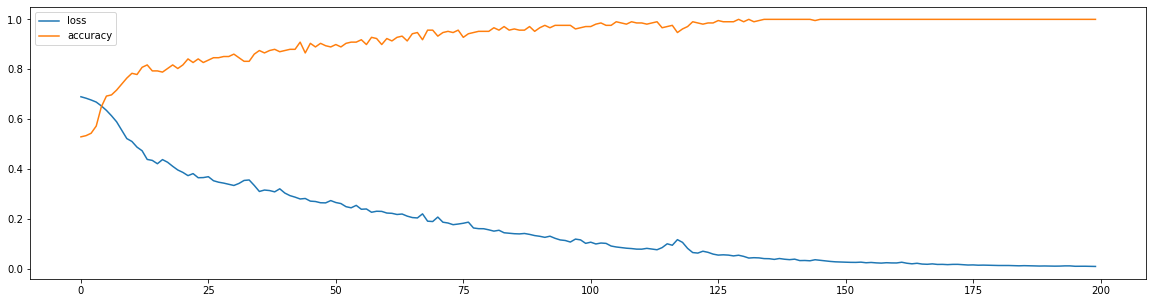

In [9]:
plt.figure(figsize = (20, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend([ 'loss', 'accuracy'], loc = 'upper left')
plt.show()